<a href="https://colab.research.google.com/github/giumanuz/DFSan_pde/blob/main/Copia_di_Homework_Giulio_Manuzzi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### For the homeworks we are going to use the "[Online News Popularity Data Set](https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity#)"

The dataset can be used both for regression and classification tasks.

#### Source:

Kelwin Fernandes INESC TEC, Porto, Portugal/Universidade do Porto, Portugal.
Pedro Vinagre ALGORITMI Research Centre, Universidade do Minho, Portugal
Paulo Cortez ALGORITMI Research Centre, Universidade do Minho, Portugal
Pedro Sernadela Universidade de Aveiro

#### Data Set Information:

* The articles were published by Mashable (www.mashable.com) and their content as the rights to reproduce it belongs to them. Hence, this dataset does not share the original content but some statistics associated with it. The original content be publicly accessed and retrieved using the provided urls.
* Acquisition date: January 8, 2015
* The estimated relative performance values were estimated by the authors using a Random Forest classifier and a rolling windows as assessment method. See their article for more details on how the relative performance values were set.

Attribute Information:

Number of Attributes: 61 (58 predictive attributes, 2 non-predictive, 1 goal field)

Attribute Information:
0. url: URL of the article (non-predictive)
1. timedelta: Days between the article publication and the dataset acquisition (non-predictive)
2. n_tokens_title: Number of words in the title
3. n_tokens_content: Number of words in the content
4. n_unique_tokens: Rate of unique words in the content
5. n_non_stop_words: Rate of non-stop words in the content
6. n_non_stop_unique_tokens: Rate of unique non-stop words in the content
7. num_hrefs: Number of links
8. num_self_hrefs: Number of links to other articles published by Mashable
9. num_imgs: Number of images
10. num_videos: Number of videos
11. average_token_length: Average length of the words in the content
12. num_keywords: Number of keywords in the metadata
13. data_channel_is_lifestyle: Is data channel 'Lifestyle'?
14. data_channel_is_entertainment: Is data channel 'Entertainment'?
15. data_channel_is_bus: Is data channel 'Business'?
16. data_channel_is_socmed: Is data channel 'Social Media'?
17. data_channel_is_tech: Is data channel 'Tech'?
18. data_channel_is_world: Is data channel 'World'?
19. kw_min_min: Worst keyword (min. shares)
20. kw_max_min: Worst keyword (max. shares)
21. kw_avg_min: Worst keyword (avg. shares)
22. kw_min_max: Best keyword (min. shares)
23. kw_max_max: Best keyword (max. shares)
24. kw_avg_max: Best keyword (avg. shares)
25. kw_min_avg: Avg. keyword (min. shares)
26. kw_max_avg: Avg. keyword (max. shares)
27. kw_avg_avg: Avg. keyword (avg. shares)
28. self_reference_min_shares: Min. shares of referenced articles in Mashable
29. self_reference_max_shares: Max. shares of referenced articles in Mashable
30. self_reference_avg_sharess: Avg. shares of referenced articles in Mashable
31. weekday_is_monday: Was the article published on a Monday?
32. weekday_is_tuesday: Was the article published on a Tuesday?
33. weekday_is_wednesday: Was the article published on a Wednesday?
34. weekday_is_thursday: Was the article published on a Thursday?
35. weekday_is_friday: Was the article published on a Friday?
36. weekday_is_saturday: Was the article published on a Saturday?
37. weekday_is_sunday: Was the article published on a Sunday?
38. is_weekend: Was the article published on the weekend?
39. LDA_00: Closeness to LDA topic 0
40. LDA_01: Closeness to LDA topic 1
41. LDA_02: Closeness to LDA topic 2
42. LDA_03: Closeness to LDA topic 3
43. LDA_04: Closeness to LDA topic 4
44. global_subjectivity: Text subjectivity
45. global_sentiment_polarity: Text sentiment polarity
46. global_rate_positive_words: Rate of positive words in the content
47. global_rate_negative_words: Rate of negative words in the content
48. rate_positive_words: Rate of positive words among non-neutral tokens
49. rate_negative_words: Rate of negative words among non-neutral tokens
50. avg_positive_polarity: Avg. polarity of positive words
51. min_positive_polarity: Min. polarity of positive words
52. max_positive_polarity: Max. polarity of positive words
53. avg_negative_polarity: Avg. polarity of negative words
54. min_negative_polarity: Min. polarity of negative words
55. max_negative_polarity: Max. polarity of negative words
56. title_subjectivity: Title subjectivity
57. title_sentiment_polarity: Title polarity
58. abs_title_subjectivity: Absolute subjectivity level
59. abs_title_sentiment_polarity: Absolute polarity level
60. shares: Number of shares (target)


The first two columns (url and time_delta) are non-predictive and should be ignored

The last column **shares** contains the value to predict.

### Regression
In the case of regression we want to predict the value of the share column.

### Classification
In the case of classification we want to predict one of two classes:

* *low* -- shares < 1,400
* *high* -- shares >= 1,400

### Metrics

#### Regression
To evaluate how good we are doing on the **regression** task we will use the Root Mean Squared Error (RMSE). RMSE is given by

$$
\sqrt{\frac{1}{n}\sum\limits_{i=1}^{n}{\Big(d_i -f_i\Big)^2}}
$$


where:

* $n$ is the number of test samples
* $d_i$ is the ground truth value of the i-th sample
* $f_i$ is the predicted value of the i-th sample


#### Classification
To evaluate how good we are doing on the **classification** task we will use the accuracy metrics. Accuracy is given by

$$
\frac{TP+TN}{TP+TN+FP+FN}
$$

where:

* TP is the number of *correctly* classified positive samples
* TN is the number of *correctly* classified negative samples
* FP is the number of *incorrectly* classified positive samples
* FN is the number of *incorrectly* classified negative samples

In [4]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00332/OnlineNewsPopularity.zip

--2023-04-16 19:33:37--  https://archive.ics.uci.edu/ml/machine-learning-databases/00332/OnlineNewsPopularity.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7476401 (7.1M) [application/x-httpd-php]
Saving to: ‘OnlineNewsPopularity.zip’

OnlineNewsPopularit 100%[===================>]   7.13M  15.8MB/s    in 0.5s    

2023-04-16 19:33:38 (15.8 MB/s) - ‘OnlineNewsPopularity.zip’ saved [7476401/7476401]



In [5]:
!unzip OnlineNewsPopularity.zip

Archive:  OnlineNewsPopularity.zip
   creating: OnlineNewsPopularity/
  inflating: OnlineNewsPopularity/OnlineNewsPopularity.names  
  inflating: OnlineNewsPopularity/OnlineNewsPopularity.csv  


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Format properly the names of the columns and remove the first two columns

In [7]:
df = pd.read_csv('OnlineNewsPopularity/OnlineNewsPopularity.csv')
df = df.rename(columns=lambda x: x.strip())
df = df.iloc[: , 2:]

##Preparazione dei dati

In [8]:
from sklearn.model_selection import train_test_split

matrix=np.array(df)
x=matrix[: , :-1]
y=np.array([elem >= 1400 for elem in matrix[:, -1]])

x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=1)

x_train, x_val, y_train, y_val=train_test_split(x_train,y_train, test_size=0.2, random_state=1)

#Decision Tree

Un Decision Tree è un algoritmo di **apprendimento supervisionato** utilizzato nell'ambito del machine learning.

Il decision tree rappresenta un **modello predittivo** che, a partire da un insieme di dati di training, costruisce un albero di decisione rappresentato da una serie di *decisioni* per giungere a una predizione.

I valori di input e output possono essere discreti o continui, ma nella mia implementazione considerero' solo valori discreti in input e valori booleani in output (YES in caso di esito positivo, NO in caso di esito negativo).

##Costruzione del DT

Il processo di costruzione del decision tree prevede la selezione della feature più importante per separare i dati in sottoinsiemi omogenei, in modo da ridurre l'entropia all'interno di ogni sottoinsieme. 
Sia $B(q)$ l'entropia di una variabile aleatoria booleana che eè vera con probabilita' $q$:

$$
B(q)=-(q \cdot log_2q + (1-q)log_2(1-q))
$$

Se un training set contiene $p$ examples positivi ed $n$ examples negativi, allora l'entropia della variabile in output nell'intero set è :

$$
H(Output)=B(\frac{p}{p+n})
$$

Un attributo A con *d* distinti valori divide il training set E in $E_1$, $E_2$, ... , $E_d$ sottoinsiemi.
Ciascun sottoinsieme $E_k$ ha $p_k$ esempi positivi e $n_k$ esempi negativi. Un esempio scelto a caso dal training set ha il valore k-esimo per l'attributo (ovvero, è in E$_k$ con probabilità $\frac{p_k + n_k}{p + n}$), quindi l'entropia attesa rimanente dopo il test dell'attributo A è:

$$
Remainder(A) = \sum\limits_{k=1}^{d}{\frac{p_k + n_k}{p + n}B(\frac{p_k}{p_k+n_k})}
$$


Per cercare, quindi, il miglior attributo A su cui splittare il dataset, bisogna trovare la feature con il **Gain maggiore**:

$$
Gain(A)=\frac{p}{p+n} - Remainder(A)
$$

L'algoritmo da noi studiato, come in genere quelli basati su alberi, e' di tipo ricorsivo.
Ci sono solamente 4 casi base:

* Se i restanti examples sono tutti positivi (o tutti negativi), allora abbiamo finito: possiamo rispondere Sì o No.
* Se non sono rimasti examples, significa che non è stato osservato alcun example per questa combinazione di valori di attributo e restituiamo il valore di output più comune dall'insieme di esempi utilizzati nella costruzione del genitore del nodo (*majority value*). 
* Se non sono rimasti attributi, ma examples sia positivi che negativi, significa che questi esempi hanno esattamente la stessa descrizione, ma classificazioni diverse.
Questo può accadere perché: c'è un errore o un **rumore** nei dati; perché il dominio è non-deterministico; perché non possiamo osservare un attributo che distinguerebbe gli examples.
* Se ci sono alcuni esempi positivi e alcuni negativi, si sceglie l'attributo migliore per dividerli (passo ricorsivo). Sulla base di questo attributo si splittano gli examples rimasti in due insiemi secondo il metodo della meduiana: gli examples con il corrispondente valore della feature minore del valore della mediana costituiranno gli examples che serviranno da input alla funzione ricorsiva sul figlio sinistro: viceversa, quelli con valore maggiore o uguale costituiranno l'input al passo ricorsivo sul figlio destro.


Una volta costruito il decision tree, esso può essere utilizzato per effettuare predizioni su nuovi dati di test, seguendo il percorso dell'albero a partire dalla radice fino ad arrivare ad una foglia che rappresenta la predizione finale.

In sintesi, l'albero decisionale rappresenta un modello intuitivo e interpretabile che permette di effettuare predizioni basate su regole semplici. Tuttavia, è importante considerare che la scelta delle feature e l'ordine di presentazione possono influire notevolmente sulla qualità delle predizioni e sulla robustezza del modello.

##Mia implementazione

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.tree import export_graphviz
import numpy as np
from statistics import median
import math


class Node:

    def __init__(self, feature, median, left, right, value=None):
        self.feature = feature
        self.median = median
        self.left = left
        self.right = right
        self.value = value
    
    def isLeaf(self):
        return self.value!=None
    
    def getFeature(self):
        return self.feature
    
    def getMedian(self):
        return self.median
    
    def getLeft(self):
        return self.left
    
    def getRight(self):
        return self.right
    
    def getValue(self):
        return self.value
    
class Tree:

    def __init__(self, height):
        self.root=None 
        self.height=height

    def entropy(self, p):
        if p==0 or p==1:
            return 0
        return -p*math.log2(p) - (1-p)*math.log2((1-p))

    def calcolaSXDX(self, feature, examples):
        leftPositives = 0
        rightPositives = 0
        leftElementsCount = 0
        rightElementsCount = 0
        mediana = median([elem[feature] for elem in examples])
        
        for i in range(len(examples)):
            if examples[i][feature] <= mediana:
                leftElementsCount += 1
                if examples[i][-1] == True:
                    leftPositives += 1
            else:
                rightElementsCount += 1
                if examples[i][-1] == True:
                    rightPositives += 1
        return leftPositives, rightPositives, leftElementsCount, rightElementsCount

    def remainder(self, feature, examples):
        leftPositives, rightPositives , leftElementsCount, rightElementsCount = self.calcolaSXDX(feature, examples)

        if (leftElementsCount==0 and rightElementsCount==0 or leftPositives ==0 and rightPositives ==0):
            return 0
        elif (leftElementsCount==0 or leftPositives ==0):
            return (rightElementsCount/(leftElementsCount+rightElementsCount))*self.entropy(rightPositives/rightElementsCount)
        elif (rightElementsCount==0) or rightPositives ==0:
            return (leftElementsCount/(leftElementsCount+rightElementsCount))*self.entropy(leftPositives/leftElementsCount)

        return (leftElementsCount/(leftElementsCount+rightElementsCount))*self.entropy(leftPositives/leftElementsCount) + (rightElementsCount/(leftElementsCount+rightElementsCount))*self.entropy(rightPositives/rightElementsCount)

    def splitFeature(self, feature, examples):
        mediana= median([elem[feature] for elem in examples])
    
        sxList=[]
        dxList=[]
        for i in range(len(examples)):
            if examples[i][feature] <= mediana:
                sxList.append(examples[i])
            else:
                dxList.append(examples[i])
        return mediana, sxList, dxList

    def gain(self, entropy, feature, examples):
        return entropy - self.remainder(feature, examples)

    def pluralityValue(self, examples):
        numPos = 0
        for i in range(len(examples)):
            if examples[i][-1] == True:
                numPos += 1
        if numPos > len(examples)/2:
            return Node(None, None, None, None, True)
        else:
            return Node(None, None, None, None, False)
        
    def allSameClass(self, examples):
        for i in range(len(examples)-1):
            if examples[i][-1] != examples[i+1][-1]:
                return False
        return True

    def fit(self, examples):
        features=[i for i in range(len(examples[0])-1)]
        self.root=self.learnDecisionTree(examples, features, examples, self.height)


    def learnDecisionTree(self, examples, attributes, parent_examples, height):

        if len(examples) == 0:
            return self.pluralityValue(parent_examples)
        elif self.allSameClass(examples):
            return Node(None, None, None, None, examples[0][-1])
        elif len(attributes) == 0 or height==0:
            return self.pluralityValue(examples)
        else:
            bestFeature = self.getBestFeature(examples, attributes)

            mediana, sx, dx=self.splitFeature(bestFeature, examples)

            leftAttributes=attributes.copy()
            leftAttributes.remove(bestFeature)
            nodoSx=self.learnDecisionTree(sx, leftAttributes, examples, height-1)

            rightAttributes=attributes.copy()
            rightAttributes.remove(bestFeature)
            nodoDx=self.learnDecisionTree(dx, rightAttributes, examples, height-1)

            nodo = Node(bestFeature, mediana, nodoSx, nodoDx)
            return nodo

    def getBestFeature(self, examples, attributes):
        positiveCount=0
        for i in range(len(examples)):
            if examples[i][-1]==True:
                positiveCount+=1
        entropy=self.entropy(positiveCount/len(examples))
        maxGain=None
        bestFeature=0
        for feature in attributes:
            gainFeature=self.gain(entropy, feature, examples)
            if maxGain==None or gainFeature>maxGain :
                maxGain=gainFeature
                bestFeature=feature
        return bestFeature

    def predict(self, x, nodo=None):
        if self.root == None:
            raise Exception("Il modello non è stato ancora addestrato")
        else:
            if nodo==None:
                nodo=self.root
            if nodo.isLeaf():
                return nodo.getValue()
            else:
                if x[nodo.getFeature()] <= nodo.getMedian():
                    return self.predict(x, nodo.getLeft())
                else:
                    return self.predict(x, nodo.getRight())
            
    def accuracy(self, x_test, y_test):
        count=0
        for i in range(len(x_test)):
            if self.predict(x_test[i])==y_test[i]:
                count+=1
        return count/len(x_test)


###Training Validation Set

Accuracy DT con altezza 0 = 52.7825949865994%
Accuracy DT con altezza 1 = 58.836512691155605%
Accuracy DT con altezza 2 = 62.60444584581428%
Accuracy DT con altezza 3 = 63.9760365757528%
Accuracy DT con altezza 4 = 64.16522150402018%
Accuracy DT con altezza 5 = 64.4647643071102%
Accuracy DT con altezza 6 = 64.81160334226706%
Accuracy DT con altezza 7 = 64.3386410215986%
Accuracy DT con altezza 8 = 64.71701087813338%
Accuracy DT con altezza 9 = 63.50307425508434%


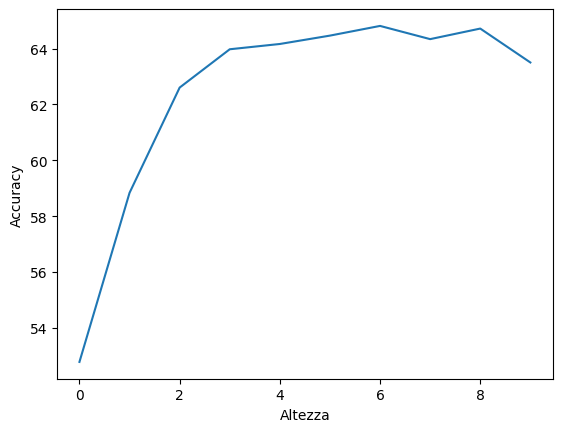

In [7]:
attributes=[i for i in range(len(x_train[0]))]

my_x_train=x_train.tolist()
for i in range(len(my_x_train)):
    my_x_train[i].append(y_train[i])

plot_x = []
plot_y = []
for i in range(15):
    myDt = Tree(height=i)
    myDt.fit(my_x_train)
    current_accuracy = myDt.accuracy(x_val,  y_val)*100
    print(f'Accuracy DT con altezza {i} = {current_accuracy}%')
    plot_x.append(i)
    plot_y.append(current_accuracy)

plt.plot(plot_x, plot_y)
plt.xlabel('Altezza')
plt.ylabel('Accuracy')
plt.show()

###Test set

In [16]:
best_index = np.argmax(plot_y)
myDT = Tree(height=best_index)

my_x_train=x_train.tolist()
for i in range(len(my_x_train)):
    my_x_train[i].append(y_train[i])


myDT.fit(my_x_train)
print('Mia implementazione Decision Tree')
print(f'Accuracy = {myDT.accuracy(x_test,  y_test )*100}%')

Mia implementazione Decision Tree
Accuracy = 64.472190692395%


###Implementazione con Scikit-Learn

In [35]:
my_x_test=x_test.copy()

scikit=tree.DecisionTreeClassifier(criterion='entropy', max_depth=best_index)
scikit=scikit.fit(x_train, y_train)

print('Scikit-learn Decision Tree')
print(f'Accuracy = {scikit.score(my_x_test, y_test)*100}%')

Scikit-learn Decision Tree
Accuracy = 64.20734014377601%


#Linear Regression and Classification

La regressione e classificazione lineare sono due tecniche del machine learning utilizzate per effettuare predizioni su dati numerici.

La regressione lineare è un processo di determinazione di una funzione lineare che approssima al meglio la relazione tra una variabile dipendente $Y$ ed una o piu' variabili indipendenti $X_1, X_2, ... , X_k$. 

La classificazione lineare, invece, ha come obiettivo quello di utilizzare le caratteristiche di un oggetto per identificare a quale classe (o gruppo) appartiene.

In entrambi i casi, la "lineare" nella regressione e classificazione lineare si riferisce alla funzione matematica utilizzata per modellare la relazione tra le variabili di input e output.


Una funzione lineare con input x e output y ha la forma:
$$
y = h(x) = w_1 x +  w_0
$$
dove $w_1$ e $w_0$ sono dei coefficienti che devono essere imparati dal modello. Possiamo quindi esprimere il modello come il prodotto scalare tra il vettore dei pesi $w = [w_0, w_1]^T$ e il vettore delle features di un sample $x = [1, x]^T$.

Il nostro obiettivo e' trovare i coefficienti $w_1$ e $w_0$ ottimi tali che la funzione di loss sia minima. 

$$
Loss(h_w) = \sum\limits_{j=1}^{N}(y_i-(w_1x_j+w_0))^2
$$

Quindi si impongono le derivate parziali rispetto ai coefficienti uguali a zero:

$$
\begin{cases}
\frac{\partial}{\partial w_0} \sum\limits_{j=1}^{N}(y_i-(w_1x_j+w_0))^2 &= 0 \\
\frac{\partial}{\partial w_1} \sum\limits_{j=1}^{N}(y_i-(w_1x_j+w_0))^2 &= 0 \\
\end{cases}
$$
Dove l'unica soluzione e':

$$
\begin{cases}
w_1 = \frac {N( \sum x_j y_j) - ( \sum x_j)( \sum y_j)}{N( \sum x_j^2) - ( \sum x_j)^2} \\
w_0 = \frac {\sum y_j - w_1 \sum x_j}{N}
\end{cases}
$$

##Preparazione dei dati

In [8]:
matrice=np.array(df)
x=matrice[: , :-1]
x=(x-x.mean(axis=0))/x.std(axis=0)
y=matrice[: , -1]

x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=1)
x_train, x_val, y_train, y_val=train_test_split(x_train,y_train, test_size=0.2, random_state=1)


##Regressione Lineare senza regolarizzaione

###Mia implementazione (con formula chiusa)

Il codice seguente implementa anche la regressione lineare senza regolarizzazione in cui uso la formula chiusa per il vettore dei pesi (Equazione normale):

$$
w^* = (X^TX)^{-1}X^Ty
$$

In [9]:
from sklearn.metrics import mean_squared_error

class LinearRegression:
    def __init__(self):
        self.w = None
        self.b = None

    def fit(self, x, y):
        x = np.insert(x, 0, 1, axis=1)
        self.w = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
        self.b = self.w[0]
        self.w = self.w[1:]

    def predict(self, x):
        return x.dot(self.w) + self.b

In [10]:
myModel=LinearRegression()
myModel.fit(x_train, y_train)

print('Mia implemntazione: Linear Regression senza regolarizzazione con formula chiusa')
print(f'error_test= {mean_squared_error(y_test, myModel.predict(x_test), squared=False)}')

Mia implemntazione: Linear Regression senza regolarizzazione con formula chiusa
error_test= 8333.573874537939


###Scikit-Learn

In [11]:
from sklearn.linear_model import SGDRegressor, SGDClassifier

scikit=SGDRegressor(max_iter=1000, penalty=None, learning_rate='constant', shuffle=False, eta0=0.00001, early_stopping=False)
scikit.fit(x_train, y_train)

print('Scikit-Learn: Linear regression senza regolarizzazione')
print(f'error_test= {mean_squared_error(y_test, scikit.predict(x_test), squared=False)}')

Scikit-Learn: Linear regression senza regolarizzazione
error_test= 8275.739371762584


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


### Implementazione con Gradient Descent

Il Gradient Descent e' un algoruitmo di ottimizzazione volto a trovare i coefficienti ottimali del modello che minimizzano la funzione di costo del modello. E' un algoritmo che funziona iterativamente aggiornando i coefficienti in base alla direzione e al valore del gradiente della funzione di costo rispetto ai coefficienti stessi. Il Learning Rate e' un iperparametro dell'algoritmo che determina quanto grande sia il passo di aggiornamento dei coefficienti ad ogni iterazione. 

$$
\begin{cases}
w_0 \leftarrow w_0 + \alpha (y - h_w(x)) \\
w_1 \leftarrow w_1 + \alpha (y - h_w(x)) \times x
\end{cases}
$$

In [12]:
class LinearRegressionClassification:
    def __init__(self, num_iter=1000, learning_rate=0.01, regolarizzation=None, regulation_parameters_L1=0.01, regulation_parameters_L2=0.01, classification=False):
        self.weights = None
        self.bias = None
        self.num_iter = num_iter
        self.learning_rate = learning_rate
        self.regolarizzation = regolarizzation
        self.regulation_parameters_L1 = regulation_parameters_L1
        self.regulation_parameters_L2 = regulation_parameters_L2
        self.classification = classification

    def fit(self, X, y):
        n_samples, n_features = X.shape
        X = np.insert(X, 0, 1, axis=1)
        self.weights = np.zeros(n_features+1)

        for i in range(self.num_iter):

            if self.classification:
                if self.regolarizzation == 'logistic':
                    y_predicted = [1 / (1 + math.exp(-i)) for i in np.dot(X, self.weights)]
                else:
                    y_predicted = [1 if i >=0 else 0 for i in np.dot(X, self.weights)]
            else:
                y_predicted = np.dot(X, self.weights)

            
            if self.regolarizzation == 'L1':
                dw=(1/n_samples)*np.dot(X.T, (y_predicted-y)) + self.regulation_parameters_L1*np.sign(self.weights)
            elif self.regolarizzation == 'L2':
                dw=(1/n_samples)*np.dot(X.T, (y_predicted-y)) + 2* self.regulation_parameters_L2*self.weights
            elif self.regolarizzation == 'elasticnet':
                dw=(1/n_samples)*np.dot(X.T, (y_predicted-y)) + self.regulation_parameters_L1*np.sign(self.weights) + 2*self.regulation_parameters_L2*self.weights
            else:
                dw=(1/n_samples)*np.dot(X.T, (y_predicted-y))

            self.weights -= self.learning_rate * dw

    def predict(self, X, classification=False, logistic=False):
        X = np.insert(X, 0, 1, axis=1)
        if classification:
            if logistic:
                y_approximated = [1 / (1 + math.exp(-i)) for i in np.dot(X, self.weights)]
                y_approximated = [1 if i >=0.5 else 0 for i in y_approximated]
            else:
                y_approximated = [1 if i >=0 else 0 for i in np.dot(X, self.weights)]
        else:
            y_approximated = np.dot(X, self.weights)
        return y_approximated

In [13]:
mioModello=LinearRegressionClassification(num_iter=1000, learning_rate=0.01)
mioModello.fit(x_train, y_train)

print('Mia implemntazione: Regressione Lineare senza regolarizzazione con gradient descent')
print(f'error_test_without_regolarization= {mean_squared_error(y_test, mioModello.predict(x_test), squared=False)}')

Mia implemntazione: Regressione Lineare senza regolarizzazione con gradient descent
error_test_without_regolarization= 8281.584927801572


##Regressione lineare con regolarizzazione L1

Lasso Regression (least Absolute Shrinkage and Selection Operator) o $L_1$ Regolarization ha la seguente ipotesi:

$$
L(y, \hat y) = MSE(y, \hat y) + \lambda L_1(w)
$$
dove 
$$
L_1(w) = \sum\limits_{j} |{w_j}|
$$
e $\lambda$ e' un iperparametro.

N.B.1 esiste anche una formula chiusa per la Lasso

N.B.2 tutte le implementazioni per le classificazioni e regressioni lineari fanno riferimento al codice sopra


###Mia implementazione con Gradient Descent

###Validation Set

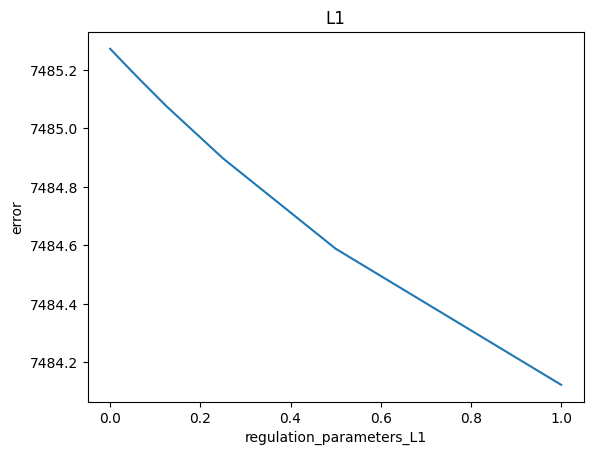

In [68]:
x_plot=[]
y_plot=[]
for i in range(15):
    l1_parameter=1/pow(2, i)
    myModel=LinearRegressionClassification(num_iter=1000, learning_rate=0.01, regolarizzation='L1', regulation_parameters_L1=l1_parameter)
    myModel.fit(x_train, y_train)
    x_plot.append(l1_parameter)
    err_curr=mean_squared_error(y_val, myModel.predict(x_val), squared=False)
    y_plot.append(err_curr)
    # print(f'error_val_L1 with {l1_parameter} reg_par= {err_curr}')
plt.plot(x_plot, y_plot)
plt.xlabel('regulation_parameters_L1')
plt.ylabel('error')
plt.title('L1')
plt.show()

###Test Set

In [70]:
best_param=x_plot[y_plot.index(min(y_plot))]
myModel=LinearRegressionClassification(num_iter=1000, learning_rate=0.01, regolarizzation='L1', regulation_parameters_L1=best_param)
myModel.fit(x_train, y_train)

print('Mia implemntazione: Regressione Lineare mediante Regolarizzazione L1 con gradient descent')
print(f'error_test_L1= {mean_squared_error(y_test, myModel.predict(x_test), squared=False)}')

Mia implemntazione: Regressione Lineare mediante Regolarizzazione L1 con gradient descent
error_test_L1= 8280.837789344616


###Implementazione con Scikit-Learn

In [71]:
scikit=SGDRegressor(max_iter=1000, penalty='l1', learning_rate='constant', shuffle=False, eta0=0.00001, early_stopping=False)
scikit.fit(x_train, y_train)

print('Scikit-Learn: Linear regression con regolarizzazione L1')
print(f'error_test= {mean_squared_error(y_test, scikit.predict(x_test), squared=False)}')

Scikit-Learn: Linear regression con regolarizzazione L1
error_test= 8275.739266113722


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


##Regressione Lineare con regolarizzazione L2

Ridge Regression o $L_2$ Regolarization é un metodo per stimare i coefficienti di modelli in scenari in cui le variabili linearmente indipendenti sono altamente correlate. $L_2$ ha la seguente ipotesi:

$$
L(y, \hat y) = MSE(y, \hat y) + \lambda L_1(w)
$$
dove 
$$
L_1(w) = \sum\limits_{j} {w_j}^2
$$
e $\lambda$ e' un iperparametro.

###Mia implementazione (con formula chiusa)

Il codice seguente implementa anche la regressione lineare con regolarizaione $L_2$ mediante formula chiusa per trovare il valore ottimale di w:

$$
w = ( X^TX+ λ I_p)^{-1}X^TY
$$

In [ ]:
class LinearRegressionL2:
    def __init__(self, lambda_=0.01):
        self.w = None
        self.b = None
        self.lambda_ = lambda_

    def fit(self, x, y):
        x = np.insert(x, 0, 1, axis=1)
        self.w = np.linalg.inv(x.T.dot(x) + self.lambda_ * np.eye(x.shape[1])).dot(x.T).dot(y)
        self.b = self.w[0]
        self.w = self.w[1:]

    def predict(self, x):
        return x.dot(self.w) + self.b

In [ ]:
myModelL2=LinearRegressionL2(lambda_=0.1)
myModelL2.fit(x_train, y_train)

print('Mia implemntazione: Linear Regression mediante Ridge Regolarization con formula chiusa')
print(f'error_test_= {mean_squared_error(y_test, myModelL2.predict(x_test), squared=False)}')


Mia implemntazione: Linear Regression mediante Ridge Regolarization con formula chiusa
error_test_= 8263.58970062892


###Scikit-Learn Implementation

In [ ]:
scikit=SGDRegressor(max_iter=1000, penalty='l2', learning_rate='constant', shuffle=False, eta0=0.00001, early_stopping=False)
scikit.fit(x_train, y_train)

print('Scikit-Learn: Linear regression con regolarizzazione L2')
print(f'error_test= {mean_squared_error(y_test, scikit.predict(x_test), squared=False)}')

Scikit-Learn: Linear regression con regolarizzazione L2
error_test= 8264.733223562718


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


###Mia implementazione con Gradient Descent

###Validation Set

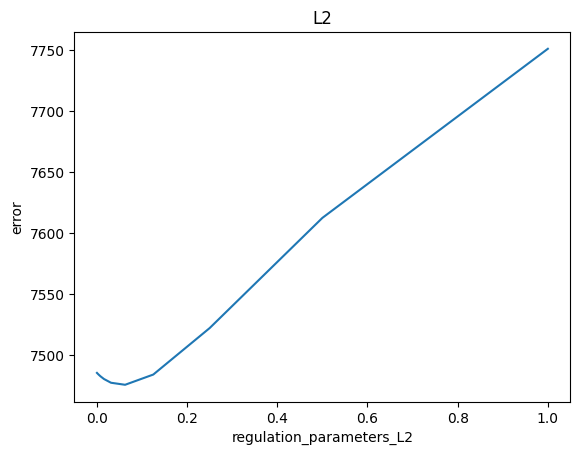

In [72]:
x_plot=[]
y_plot=[]
for i in range(15):
    l2_parameter=1/pow(2, i)
    myModel=LinearRegressionClassification(num_iter=1000, learning_rate=0.01, regolarizzation='L2', regulation_parameters_L2=l2_parameter)
    myModel.fit(x_train, y_train)
    x_plot.append(l2_parameter)
    err_curr=mean_squared_error(y_val, myModel.predict(x_val), squared=False)
    y_plot.append(err_curr)
    # print(f'error_val_L2 with {l2_parameter} reg_par= {err_curr}')
plt.plot(x_plot, y_plot)
plt.xlabel('regulation_parameters_L2')
plt.ylabel('error')
plt.title('L2')
plt.show()

###Test Set

In [73]:
best_param=x_plot[y_plot.index(min(y_plot))]
myModel=LinearRegressionClassification(num_iter=1000, learning_rate=0.01, regolarizzation='L2', regulation_parameters_L2=best_param)
myModel.fit(x_train, y_train)

print('Mia implemntazione: Regressione Lineare mediante Regolarizzazione L2 con gradient descent')
print(f'error_test_L2= {mean_squared_error(y_test, myModel.predict(x_test), squared=False)}')

Mia implemntazione: Regressione Lineare mediante Regolarizzazione L2 con gradient descent
error_test_L2= 8270.084274707051


##Regressione Lineare con Elastic Regolarization

Ridge Regression o $L_2$ Regolarization é un metodo per stimare i coefficienti di modelli in scenari in cui le variabili linearmente indipendenti sono altamente correlate. $L_2$ ha la seguente ipotesi:

$$
L(y, \hat y) = MSE(y, \hat y) + \lambda_1 L_1(w) + \lambda_2 L_2(w)
$$
dove 
$$
L_1(w) = \sum\limits_{j} {w_j}^2 \, L_2(w) = \sum\limits_{j} |{w_j}|
$$
e $\lambda_1$ e $\lambda_2$ sono iperparametri.

###Implementazione con SciKit-Learn

In [ ]:
scikit=SGDRegressor(max_iter=1000, penalty='elasticnet', learning_rate='constant', shuffle=False, eta0=0.00001, early_stopping=False)
scikit.fit(x_train, y_train)

print('Scikit-Learn: regressione lineare con regolarizzazione elasticnet')
print(f'error_test= {mean_squared_error(y_test, scikit.predict(x_test), squared=False)}')

Scikit-Learn: Linear regression con regolarizzazione elasticnet
error_test= 8264.73543139301


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


###Mia implementazione con Gradient Descent

###Validation Set

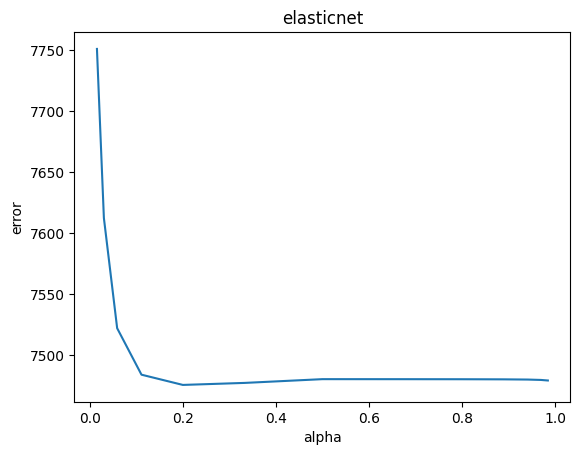

In [25]:
dictionary={}
x_plot=[]
y_plot=[]
for l2 in range(7):
  for l1 in range(7):
    l1_parameter=1/pow(2, l1)
    l2_parameter=1/pow(2, l2)
    alpha=l1_parameter/(l1_parameter+l2_parameter)
    dictionary[alpha]=(l1_parameter, l2_parameter)

for alpha, coppia in sorted(dictionary.items(), key=lambda item: item[0]):
    l1_parameter, l2_parameter = coppia
    myModel=LinearRegressionClassification(num_iter=1000, learning_rate=0.01, regolarizzation='elasticnet', regulation_parameters_L1=l1_parameter, regulation_parameters_L2=l2_parameter)
    myModel.fit(x_train, y_train)
    err_curr=mean_squared_error(y_val, myModel.predict(x_val), squared=False)
    x_plot.append(alpha)
    y_plot.append(err_curr)
    dictionary[alpha]=(err_curr, l1_parameter, l2_parameter)

plt.plot(x_plot, y_plot)
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('elasticnet')
plt.show()

###Test Set

In [26]:
alpha, tupla = min(dictionary.items(), key=lambda x: x[1][0])
error, best_l1, best_l2 = tupla

myModel=LinearRegressionClassification(num_iter=1000, learning_rate=0.01, regolarizzation='elastic', regulation_parameters_L1=best_l1, regulation_parameters_L2=best_l2)
myModel.fit(x_train, y_train)

print('Mia implemntazione: Regressione Lineare mediante Regolarizzazione elastica con gradient descent')
print(f'error_test_elastic= {mean_squared_error(y_test, myModel.predict(x_test), squared=False)}')

Mia implemntazione: Regressione Lineare mediante Regolarizzazione elastica con gradient descent
error_test_elastic= 8281.584927801572


##Classificazione Lineare senza regolarizzazione

Nelle seguenti implementazioni sfrutto la regressione lineare, gia' implementata, per costruirmi i classificatori lineari.
Supponiamo di avere un problema di classificazione binaria con due classi etichettate come 0 e 1, si puo' utilizzare la regressione lineare per costruire una linea che separa le due classi. I valori predetti non saranno necessariamente compresi tra 0 e 1, quindi è necessario applicare una threshold function:

$$
h_w(x)=Threshold(w \cdot x)
$$
dove

$$  
Threshold(z) = \begin{cases}
1 & z \geq 0 \\
0 & altrimenti \\
\end{cases}
$$

###Preparazione dei dati

In [ ]:
y_train_class=np.array([1 if elem >= 1400 else 0 for elem in y_train])
y_test_class=np.array([1 if elem >= 1400 else 0 for elem in y_test])

###Mia implementazione

In [ ]:
from sklearn.metrics import accuracy_score

myModel=LinearRegressionClassification(num_iter=1000, learning_rate=0.01, classification=True)
myModel.fit(x_train, y_train_class)

print('Mia implemntazione: Linear Classification senza regolarizzazione con gradient descent')
print(f'classification_test_without_regolarization= {accuracy_score(y_test_class, myModel.predict(x_test, classification=True))*100} %')


Mia implemntazione: Linear Classification senza regolarizzazione con gradient descent
classification_test_without_regolarization= 57.888762769580026 %


###SciKit Implementation

In [ ]:
scikit = SGDClassifier(max_iter=1000, penalty=None, learning_rate='constant', loss='perceptron' ,shuffle=False, eta0=0.00001, early_stopping=False)
scikit.fit(x_train, y_train_class)

print('Scikit learn implementation: Classificazione Lineare senza Regolarizzazion')
print(f'classification_test_without_regolarization_sklearn= {accuracy_score(y_test_class, scikit.predict(x_test))*100} %')


Scikit learn implementation: Classificazione Lineare senza Regolarizzazion
classification_test_without_regolarization_sklearn= 57.283390087022326 %


##Classificazione Lineare con Regolarizzazione L1

###Mia implementazione

In [ ]:
myModel=LinearRegressionClassification(num_iter=1000, learning_rate=0.01, regolarizzation='L1', classification=True)
myModel.fit(x_train, y_train_class)

print('Mia implemntazione: Classificazione Lineare con Regolarizzazione L1')
print(f'classification_test_L1= {accuracy_score(y_test_class, myModel.predict(x_test, classification=True))*100} %')


Mia implemntazione: Classificazione Lineare con Regolarizzazione L1
classification_test_L1= 56.62756968091814 %


###Scikit Implementation

In [ ]:
scikit = SGDClassifier(max_iter=1000, penalty='l1', learning_rate='constant', loss='perceptron', shuffle=False, eta0=0.00001, early_stopping=False)
scikit.fit(x_train, y_train_class)

print('Scikit learn implementation: Classificazione Lineare con Regolarizzazione L1')
print(f'classification_test_L1_sklearn= {accuracy_score(y_test_class, scikit.predict(x_test))*100} %')


Scikit learn implementation: Classificazione Lineare con Regolarizzazione L1
classification_test_L1_sklearn= 50.498171270021444 %


##Classificazione Lineare con Regolarizzazione L2

###Mia implementazione

In [ ]:
myModel=LinearRegressionClassification(num_iter=1000, learning_rate=0.01, regolarizzation='L2', classification=True)
myModel.fit(x_train, y_train_class)

print('Mia implemntazione: Classificazione Lineare con Regolarizzazione L2')
print(f'classification_test_L2= {accuracy_score(y_test_class, myModel.predict(x_test, classification=True))*100} %')

Mia implemntazione: Classificazione Lineare con Regolarizzazione L2
classification_test_L2= 57.888762769580026 %


###Implementazione con SciKit 

In [ ]:
scikit = SGDClassifier(max_iter=1000, penalty='l2', learning_rate='constant', loss='perceptron', shuffle=False, eta0=0.00001, early_stopping=False)
scikit.fit(x_train, y_train_class)

print('Scikit learn implementation: Classificazione Lineare con Regolarizzazione L2')
print(f'classification_test_L2_sklearn= {accuracy_score(y_test_class, scikit.predict(x_test))*100} %')


Scikit learn implementation: Classificazione Lineare con Regolarizzazione L2
classification_test_L2_sklearn= 58.64547862277715 %


##Classificazione con ElasticNet Regolarization

###Mia implementazione

In [ ]:
myModel=LinearRegressionClassification(num_iter=1000, learning_rate=0.01, regolarizzation='elasticnet', classification=True)
myModel.fit(x_train, y_train)

print('Mia implemntazione: Classificazione Lineare con ElasticNet Regolarization')
print(f'classification_test_elasticnet= {accuracy_score(y_test_class, myModel.predict(x_test, classification=True))*100} %')


Mia implemntazione: Classificazione Lineare con ElasticNet Regolarization
classification_test_elasticnet= 59.894059780552396 %


###Implementazione con Scikit

In [ ]:
scikit = SGDClassifier(max_iter=1000, penalty='elasticnet', learning_rate='constant', loss='perceptron', shuffle=False, eta0=0.00001, early_stopping=False)
scikit.fit(x_train, y_train_class)

print('Scikit learn implementation: Classificazione Lineare con Regolarizzazione elasticnet')
print(f'classification_test_elasticnet_sklearn= {accuracy_score(y_test_class, scikit.predict(x_test))*100} %')


Scikit learn implementation: Classificazione Lineare con Regolarizzazione elasticnet
classification_test_elasticnet_sklearn= 52.743094967839575 %


#Algoritmo KNN

###Preparazione dei dati

In [9]:
matrice=np.array(df)
x=matrice[: , :-1]
y_regres=matrice[: , -1]
y_class=np.array([elem >= 1400 for elem in matrice[:, -1]])

x_train_class, x_test_class, y_train_class, y_test_class=train_test_split(x,y_class, test_size=0.2, random_state=1)
x_train_class, x_val_class, y_train_class, y_val_class=train_test_split(x_train_class,y_train_class, test_size=0.2, random_state=1)


x_train_regres, x_test_regres, y_train_regres, y_test_regres=train_test_split(x,y_regres, test_size=0.2, random_state=1)
x_train_regres, x_val_regres, y_train_regres, y_val_regres=train_test_split(x_train_regres,y_train_regres, test_size=0.2, random_state=1)


##Implementazione con Scikit (Regressione)

accurancy of 1 neighbors= 54.98975248305218%
accurancy of 2 neighbors= 53.08213778968942%
accurancy of 3 neighbors= 56.17215828472332%
accurancy of 4 neighbors= 54.532555573072685%
accurancy of 5 neighbors= 56.897367176414946%
accurancy of 6 neighbors= 56.298281570234906%
accurancy of 7 neighbors= 57.74869935361816%
accurancy of 8 neighbors= 56.66088601608072%
accurancy of 9 neighbors= 57.953649692574494%
accurancy of 10 neighbors= 56.739713069525465%
accurancy of 11 neighbors= 57.401860318461296%
accurancy of 12 neighbors= 56.17215828472332%
accurancy of 13 neighbors= 56.94466340848179%
accurancy of 14 neighbors= 56.723947658836515%
accurancy of 15 neighbors= 58.079772978086076%
accurancy of 16 neighbors= 57.417625729150245%
accurancy of 17 neighbors= 58.31625413842031%
accurancy of 18 neighbors= 57.8905880498187%
accurancy of 19 neighbors= 58.205896263597666%
accurancy of 20 neighbors= 57.78023017499606%
accurancy of 21 neighbors= 57.953649692574494%
accurancy of 22 neighbors= 57.575

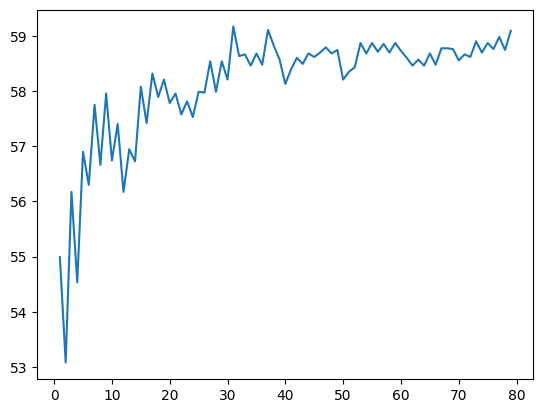

In [34]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn import metrics

x_plot=[]
y_plot=[]
dictionary={}
for i in range(1, 80):
    scikitKneighborsClassifier=KNeighborsClassifier(n_neighbors=i)
    scikitKneighborsClassifier.fit(x_train_class, y_train_class)
    predictions=scikitKneighborsClassifier.predict(x_val_class)
    current_accuracy=metrics.accuracy_score(y_val_class, predictions)*100
    print(f'accurancy of {i} neighbors= {current_accuracy}%')
    x_plot.append(i)
    y_plot.append(current_accuracy)
    dictionary[i]=current_accuracy
plt.plot(x_plot, y_plot)
plt.show()

###Mia implementazione sul validation Set

In [24]:
class MyKNeighbors:

    def __init__(self, n_neighbors=5, mode='classification'):
        self.n_neighbors=n_neighbors
        self.mode=mode

    def fit(self, x_train, y_train):
        self.x_train=x_train
        self.y_train=y_train

    def predict(self, x_test):
        result=[]
        for i in range(len(x_test)):

            difference=self.x_train-x_test[i]
            distanza=np.linalg.norm(difference, axis=1)
            distances=np.argpartition(distanza, self.n_neighbors)[:self.n_neighbors]

            if self.mode=='classification':
                classification=self.majority_vote(self.y_train[distances])
                result.append(classification)
            if self.mode=='regression':
                regression=np.mean(self.y_train[distances])
                result.append(regression)

        return result
    
    def majority_vote(self, neighbors):
        class_counter = {}
        for i in neighbors:
            if i in class_counter:
                class_counter[i] += 1
            else:
                class_counter[i] = 1
        return max(class_counter, key=class_counter.get)


[(31, 59.167586315623524), (37, 59.10452467286773), (79, 59.08875926217878), (77, 58.978401387356136), (73, 58.899574333911396), (53, 58.8680435125335), (55, 58.8680435125335), (59, 58.8680435125335), (75, 58.8680435125335), (57, 58.852278101844554), (38, 58.820747280466655), (47, 58.789216459088756), (67, 58.773451048399814), (68, 58.773451048399814), (69, 58.757685637710864), (76, 58.757685637710864), (49, 58.741920227021915), (78, 58.741920227021915), (60, 58.726154816332965), (56, 58.710389405644015), (46, 58.694623994955066), (58, 58.694623994955066), (74, 58.694623994955066), (35, 58.67885858426612), (44, 58.67885858426612), (48, 58.67885858426612), (54, 58.67885858426612), (65, 58.67885858426612), (33, 58.663093173577174), (71, 58.663093173577174), (32, 58.631562352199275), (45, 58.615796941510325), (72, 58.615796941510325), (42, 58.600031530821376), (61, 58.600031530821376), (39, 58.568500709443484), (63, 58.568500709443484), (70, 58.552735298754534), (27, 58.536969888065585), 

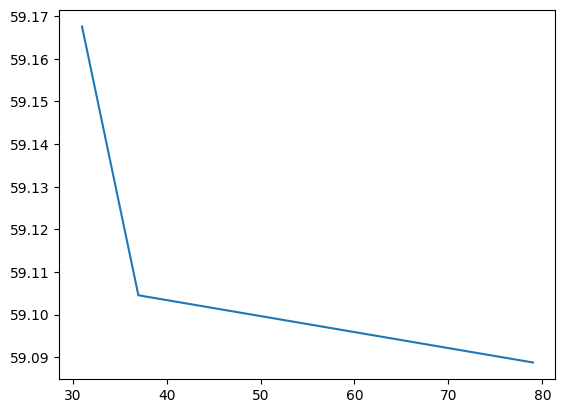

In [35]:
dic=sorted(dictionary.items(), key=lambda x: x[1], reverse=True)
testing=[elem[0] for elem in dic[:5]]

x_plot=[]
y_plot=[]
dictionary={}
for k in testing:
    myModel=MyKNeighbors(n_neighbors=k, mode='classification')
    myModel.fit(x_train_class, y_train_class)
    predictions=myModel.predict(x_val_class)
    current_accuracy=metrics.accuracy_score(y_val_class, predictions)*100
    print(f'accurancy of {k} neighbors= {current_accuracy}%')
    x_plot.append(k)
    y_plot.append(current_accuracy)
    dictionary[k]=current_accuracy
    
plt.plot(x_plot, y_plot)
plt.show()

###Test Set

In [36]:
dic=sorted(dictionary.items(), key=lambda x: x[1], reverse=True)
best_k=dic[0][0]

myModel=MyKNeighbors(n_neighbors=best_k, mode='classification')
myModel.fit(x_train_class, y_train_class)
predictions=myModel.predict(x_test_class)
current_accuracy=metrics.accuracy_score(y_test_class, predictions)*100

print('Mia implementazione di classificazione con KNeighbors ')
print(f'accurancy of {k} neighbors= {current_accuracy}%')

Mia implementazione di classificazione con KNeighbors 
accurancy of 79 neighbors= 59.074284272922185%


##Implementazione con Scikit (regressione)

error of 1 neighbors= 15225.924163065538
error of 2 neighbors= 11424.510176904778
error of 3 neighbors= 9702.991416533727
error of 4 neighbors= 9186.93724191813
error of 5 neighbors= 8755.436625217835
error of 6 neighbors= 8490.828485311627
error of 7 neighbors= 8421.428505625126
error of 8 neighbors= 8334.404259383251
error of 9 neighbors= 8275.14888784876
error of 10 neighbors= 8175.616754782379
error of 11 neighbors= 8055.688675956313
error of 12 neighbors= 8021.897728664112
error of 13 neighbors= 7967.643799386469
error of 14 neighbors= 7944.471671283817
error of 15 neighbors= 7888.846262831082
error of 16 neighbors= 7846.124723319356
error of 17 neighbors= 7835.297089828307
error of 18 neighbors= 7842.36276406095
error of 19 neighbors= 7857.393617786748
error of 20 neighbors= 7832.374656456379
error of 21 neighbors= 7810.077348671558
error of 22 neighbors= 7787.595606829665
error of 23 neighbors= 7765.182884569972
error of 24 neighbors= 7751.905973628995
error of 25 neighbors= 773

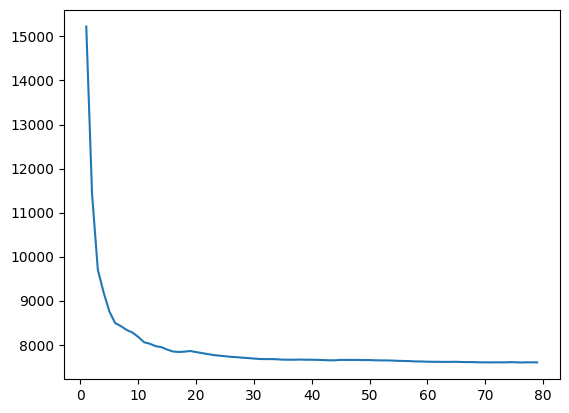

In [43]:
x_plot=[]
y_plot=[]
dictionary={}
for i in range(1, 80):
    scikit=KNeighborsRegressor(n_neighbors=i)
    scikit.fit(x_train_regres, y_train_regres)
    predictions=scikit.predict(x_val_regres)
    current_error=metrics.mean_squared_error(y_val_regres, predictions, squared=False)
    print(f'error of {i} neighbors= {current_error}')
    x_plot.append(i)
    y_plot.append(current_error)
    dictionary[i]=current_error
plt.plot(x_plot, y_plot)
plt.show()

##Mia implementazione sul validation Set

error of 76 neighbors= 7596.518864322459%
error of 79 neighbors= 7598.097599875955%
error of 73 neighbors= 7598.503817814445%
error of 71 neighbors= 7598.617012346292%
error of 77 neighbors= 7599.065373404431%


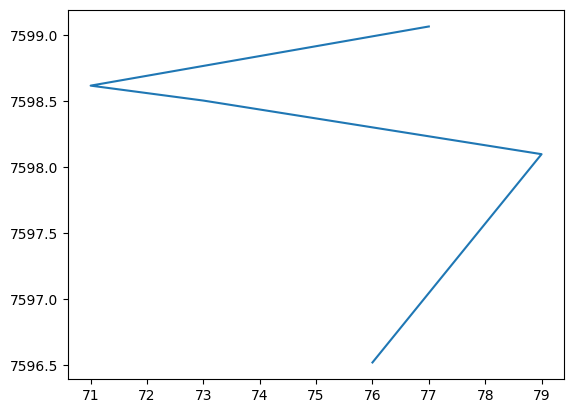

In [44]:
dic=sorted(dictionary.items(), key=lambda x: x[1], reverse=False)
testing=[elem[0] for elem in dic[:5]]

x_plot=[]
y_plot=[]
dictionary={}
for k in testing:
    myModel=MyKNeighbors(n_neighbors=k, mode='regression')
    myModel.fit(x_train_regres, y_train_regres)
    predictions=myModel.predict(x_val_regres)
    current_error=metrics.mean_squared_error(y_val_regres, predictions, squared=False)
    print(f'error of {k} neighbors= {current_error}%')
    x_plot.append(k)
    y_plot.append(current_error)
    dictionary[k]=current_error
    
plt.plot(x_plot, y_plot)
plt.show()

##Test Set

In [45]:
dic=sorted(dictionary.items(), key=lambda x: x[1], reverse=False)
best_k=dic[0][0]

myModel=MyKNeighbors(n_neighbors=best_k, mode='regression')
myModel.fit(x_train_regres, y_train_regres)
predictions=myModel.predict(x_test_regres)
current_error=metrics.mean_squared_error(y_test_regres, predictions, squared=False)

print('Mia implementazione di regressione con KNeighbors ')
print(f'error of {k} neighbors= {current_error}%')

Mia implementazione di regressione con KNeighbors 
error of 77 neighbors= 8419.930587636683%


#Rete Neurale

Una rete neurale è un modello computazionale ispirato al funzionamento del cervello umano. È composta da un insieme di unità di elaborazione, chiamate neuroni artificiali, che sono interconnesse tra loro attraverso connessioni sinaptiche. Queste connessioni hanno un peso che determina l'importanza dell'informazione trasmessa tra i neuroni.


##Regressione con Rete Neurale

Quindi si addestra la rete neurale sul training set tramite l'aggiornamento dei pesi con le funzioni di Forward e BackPropagation. Nella funzione di Forward si calcolano le risposte lineari $z_i$ e i relativi output $a_i$. Con un solo hidden layer avremo:

$
z_1 = W_1 \cdot x + b_1 
$

$
a_1 = σ(z_1)
$

$
z_2 = W_2 \cdot a_1 + b_2
$

$
a_2 = σ (z_2)
$

Nella funzione backPropataion, derivando l funzione di Loss si hanno i seguenti risultati:

$$
\frac{\partial L }{ \partial z_{1}^{(i)} } =  \frac{\partial L }{ \partial z_{2}^{(i)} } W_2^T * \sigma'(a_1^{(i)})
$$

$$
\frac{\partial L }{ \partial z_{2}^{(i)} } = (a_2^{(i)} - y^{(i)}) \cdot  \sigma'(a_2^{(i)})
$$

$$
\frac{\partial L }{ \partial W_1 } = X^T \frac{\partial L }{ \partial z_{1}^{(i)} } 
$$

$$
\frac{\partial L }{ \partial W_2 } = a_1^{(i) T}  \frac{\partial L }{ \partial z_{2}^{(i)} } 
$$

$$
\frac{\partial L }{ \partial b_1 } = \sum_i{\frac{\partial L }{ \partial z_{1}^{(i)}}}
$$

$$
\frac{\partial L }{ \partial b_2 } = \sum_i{\frac{\partial L }{ \partial z_{2}^{(i)}}}
$$

dove

$ z_1 $ e' l'output degli hidden nodes

$ z_2 $ e' l'uscita degli output nodes

$
σ(x) = \frac{1}{1+e^{-x}}
$

$
σ'(x) = σ(x) * (1 - σ(x))
$

N.B. Si poteva utilizzare un'altra qualsiasi funzione non lineare (es. Tanh, ReLu ...) a patto che fosse limitata, monotona e squashing.




###Mia implementazione

In [ ]:
class NeuralNetwork:
    
    def __init__(self, input_dim, hidden_dim, output_dim, learning_rate=0.01, classification=False, epochs=10):
        self.W1 = np.random.randn(input_dim, hidden_dim)
        self.b1 = np.zeros((1, hidden_dim))
        self.W2 = np.random.randn(hidden_dim, output_dim)
        self.b2 = np.zeros((1, output_dim))
        self.learning_rate = learning_rate
        self.classification = classification
        self.epochs = epochs


    def forward(self, X):

        sigmoide_function = np.vectorize(lambda x: self.sigmoid(x))

        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = sigmoide_function(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.y_hat = sigmoide_function(self.z2)

        return self.y_hat
    
    def backwardRegressor(self, X, y_true, y_hat):

        difference = y_hat - y_true

        sigmoide_derivative = np.vectorize(lambda x: self.sigmoid(x) * self.sigmoid(1 - x))

        dz2 = np.dot(difference, sigmoide_derivative(y_hat))
        dW2 = np.dot(self.a1.T, dz2)
        db2 = np.sum(dz2, axis=0, keepdims=True)

        dz1 = np.dot(dz2, self.W2.T)* sigmoide_derivative(self.a1)
        dW1 = np.dot(X.T, dz1)
        db1 = np.sum(dz1, axis=0, keepdims=True)

        return dW1, db1, dW2, db2
        
    def backwardClassifier(self, X, y_true, y_hat):

        dz2 = y_hat - y_true
        dW2 = np.dot(self.a1.T, dz2)
        db2 = np.sum(dz2, axis=0, keepdims=True)

        dz1 = np.dot(dz2, self.W2.T) * (1 - np.power(self.a1, 2))
        dW1 = np.dot(X.T, dz1)  
        db1 = np.sum(dz1, axis=0, keepdims=True)

        return dW1, db1, dW2, db2


    def sigmoid(self, gamma):
        if gamma < 0:
            return 1 - 1/(1 + math.exp(gamma))
        else:
            return 1/(1 + math.exp(-gamma))

        
    def train (self, X_train, y_train):
        for i in range(self.epochs):
            y_hat = self.forward(X_train)
            if self.classification == True:
                dW1, db1, dW2, db2 = self.backwardClassifier(X_train, y_train, y_hat)
            else:
                dW1, db1, dW2, db2 = self.backwardRegressor(X_train, y_train, y_hat)
            self.W1 -= (self.learning_rate/len(X_train)) * dW1
            self.b1 -= (self.learning_rate/len(X_train)) * db1
            self.W2 -= (self.learning_rate/len(X_train)) * dW2
            self.b2 -= (self.learning_rate/len(X_train)) * db2
    
    def predict(self, X_test):
        y=self.forward(X_test)
        if self.classification == False:
            return y
        else:
            return [1 if i >= 0.5 else 0 for i in y]


In [ ]:
myNetwork = NeuralNetwork(input_dim=58, hidden_dim=250, output_dim=1, learning_rate=0.001)
myNetwork.train(X_train=x_train, y_train=y_train, epochs=10)

print('Mia implemntazione di Rete Neurale con 250 hidden nodes')
print(f'accuracy_my_neural_network: {mean_squared_error(y_test, myNetwork.predict(x_test), squared=False)}')


###SciKit 

In [ ]:
from sklearn.neural_network import MLPClassifier
scikit = MLPClassifier(hidden_layer_sizes=(250, ), activation='logistic', solver='sgd', learning_rate_init=0.001, max_iter=10, shuffle=False, random_state=1, learning_rate='constant', alpha=0, )
scikit.fit(x_train, y_train)

print('Scikit-Learn: rete neurale')
print(f'accuracy_sklearn_neural_network: {mean_squared_error(y_test, scikit.predict(x_test), squared=False)}')


##Classificazione con rete neurale

Per quanto riguarda il passo di forward, è identico a quello utilizzato per la regressione. Per quanto riguarda il backward, occorre riformulare la dimostrazione vista in classe utilizzando la Binary Cross Entropy come funzione di Loss, al posto del MSE.

$$
L = - \frac{1}{m} \sum\limits_{i} \Big( y^{(i)} \log {( a_2^{(i)} )} + (1- y^{(i)}) ⋅ \log (1- a_2^{(i)})
$$

Il passo di BackPropagation è invece implementato nel seguente modo:

$$
\frac{\partial L }{ \partial z_{2}^{(i)} } = a_2^{(i)} - y^{(i)}
$$

$$
\frac{\partial L }{ \partial W_2 } = a_1^{(i) T}  \frac{\partial L }{ \partial z_{2}^{(i)} }
$$

$$
\frac{\partial L }{ \partial b_2 } = \sum_i{\frac{\partial L }{ \partial z_{2}^{(i)}}}
$$

$$
\frac{\partial L }{ \partial z_{1}^{(i)} } =  \frac{\partial L }{ \partial z_{2}^{(i)} } W_2^T * ( 1 - a_1^{(i) 2})
$$

$$
\frac{\partial L }{ \partial W_1 } = X^T \frac{\partial L }{ \partial z_{1}^{(i)} } 
$$

$$
\frac{\partial L }{ \partial b_1 } = \sum_i{\frac{\partial L }{ \partial z_{1}^{(i)}}}
$$


N.B. Il codice è implementato nella regressione scritta sopra

###Mia implementazione

In [ ]:
classification_function = np.vectorize(lambda x: 1 if x >= 1400 else 0)
mt_y_train_class = classification_function(y_train)
my_y_test_class = classification_function(y_test)
mt_y_train_class = mt_y_train_class.reshape(mt_y_train_class.shape[0], 1)
my_y_test_class = my_y_test_class.reshape(my_y_test_class.shape[0], 1)

myModel = NeuralNetwork(input_dim=58, hidden_dim=250, output_dim=1, learning_rate=0.1, classification=True, epochs=10)
myModel.train(X_train=x_train, y_train=mt_y_train_class)
print("Mia implementazione di classificazione con Rete Neurale con 250 hidden nodes")
print(f'classification_test_neural_network= {accuracy_score(my_y_test_class, myModel.predict(x_test))*100} %')


###Implementazione con SciKit 

In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(250, ), activation='logistic', learning_rate_init=0.001, max_iter=10, shuffle=False)
clf.fit(x_train, y_train_class)

print('Scikit-Learn: classificazione con rete neurale')
print(f'classification_test_sklearn_neural_network= {accuracy_score(y_test_class, clf.predict(x_test))*100} %')